In [216]:
%matplotlib notebook

In [151]:
!jupyter nbconvert --to script net.ipynb

[NbConvertApp] Converting notebook net.ipynb to script
[NbConvertApp] Writing 1599 bytes to net.py


In [179]:
import scipy
import sys
import os
import numpy as np
import caffe

import matplotlib
import matplotlib.pyplot as plt

In [203]:
weights = 'model/VGG_ILSVRC_16_layers.caffemodel'
model = 'model/VGG_ILSVRC_16_layers_deploy.prototxt'

SUBTRACT_MEAN = False
SWITCH_R_AND_B = False
TEST_IMAGE = 'data/images/dog.jpg'
MEANS = np.array([103.939, 116.779, 123.68], dtype=np.int)

In [169]:
def get_img(path):
    return np.array(scipy.misc.imread(path), dtype=np.int)

def top_k(elements, labels, k = 5): 
    top = elements.argsort()[-k:][::-1]
    probs = elements[top]
    return list(zip(probs, np.array(labels)[top]))

def print_top_k(elements, labels, k = 5):
    print("\n".join(['{:.4f} {}'.format(prob, name[10:]) for prob, name in top_k(elements, labels, k = k)]))

In [170]:
labels = open('data/labels.txt').read().split('\n')

In [130]:
net = caffe.Classifier(model, weights)

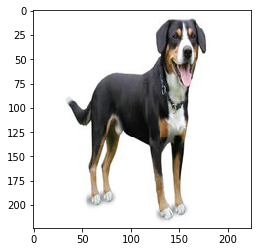

In [217]:
img = get_img(TEST_IMAGE)

# BGR

#means = np.array([0, 0, 0])
for y in img:
    for x in y:
        if SWITCH_R_AND_B:
            r = x[0]
            g = x[1]
            b = x[2]
            x[0] = b
            x[2] = r
        if SUBTRACT_MEAN:
            x -= MEANS
plt.imshow(np.array(img, dtype=np.float32) * 255)


In [214]:
net.forward(data = np.array([np.moveaxis(np.array(img), 2, 0)]))
#_ = net.forward()

In [210]:
fc8 = net.blobs['fc8'].data[0]
prob = net.blobs['prob'].data[0]
with open('data/fc8.txt', 'w') as f:
    f.write(','.join([str(x) for x in fc8]))
    f.write('\n')

prob = net.blobs['prob'].data[0]
with open('data/prob.txt', 'w') as f:
    f.write('\n'.join(['{:.10f} {:<4} {}'.format(x, idx, labels[idx]) for idx, x in enumerate(prob)]))

print_top_k(prob, labels, k = 10)


0.6825 Great Dane
0.1112 Walker hound, Walker foxhound
0.0505 English foxhound
0.0182 black-and-tan coonhound
0.0157 Weimaraner
0.0145 dalmatian, coach dog, carriage dog
0.0143 German short-haired pointer
0.0134 boxer
0.0103 Doberman, Doberman pinscher
0.0102 bluetick
